In [1]:
import uproot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

f = uproot.open('root://eospublic.cern.ch//eos/opendata/cms/datascience/HiggsToBBNtupleProducerTool/HiggsToBBNTuple_HiggsToBB_QCD_RunII_13TeV_MC/train/ntuple_merged_10.root')

In [2]:
tree = f['deepntuplizer/tree']

In [3]:
jet_labs = ['fj_pt', 
            'fj_sdmass',
            'fj_mass',
            'fj_tau21',
            'fj_jetNTracks',
            'fj_trackSipdSig_0',
            'fj_trackSipdSig_1']

jet_features = tree.arrays(branches=['fj_pt', 
                                     'fj_sdmass',
                                     'fj_mass',
                                     'fj_tau21',
                                     'fj_jetNTracks',
                                     'fj_trackSipdSig_0',
                                     'fj_trackSipdSig_1'],
                           entrystop=20000,
                           namedecode='utf-8')

track_features = tree.arrays(branches=['track_pt',
                                       'track_dxy',
                                       'track_dxysig',
                                       'track_dz',
                                       'track_dzsig',
                                       'trackBTag_Sip2dSig',
                                       'trackBTag_Sip2dVal',
                                       'trackBTag_Sip3dSig',
                                       'trackBTag_Sip3dVal',
                                       'trackBTag_PtRatio',
                                       'trackBTag_PParRatio'],
                             entrystop=20000,
                             namedecode='utf-8')

In [4]:
labels = tree.arrays(branches=['label_QCD_b', 
                               'label_QCD_bb', 
                               'label_QCD_c', 
                               'label_QCD_cc', 
                               'label_QCD_others', 
                               'label_H_bb', 
                               'sample_isQCD'], 
                     entrystop=20000,
                     namedecode='utf-8')

label_QCD = labels['sample_isQCD'] * (labels['label_QCD_b'] + \
                                      labels['label_QCD_bb'] + \
                                      labels['label_QCD_c'] + \
                                      labels['label_QCD_cc'] + \
                                      labels['label_QCD_others'])

# label Hbb
label_Hbb = labels['label_H_bb']

In [5]:
sv_labs = ['n_sv',
           'sv_d3d',
           'sv_d3derr',
           'sv_d3dsig',
           'sv_mass',
           'sv_ntracks',
           'sv_pt']

sv_feats = tree.arrays(branches=sv_labs, 
                     entrystop=20000,
                     namedecode='utf-8')

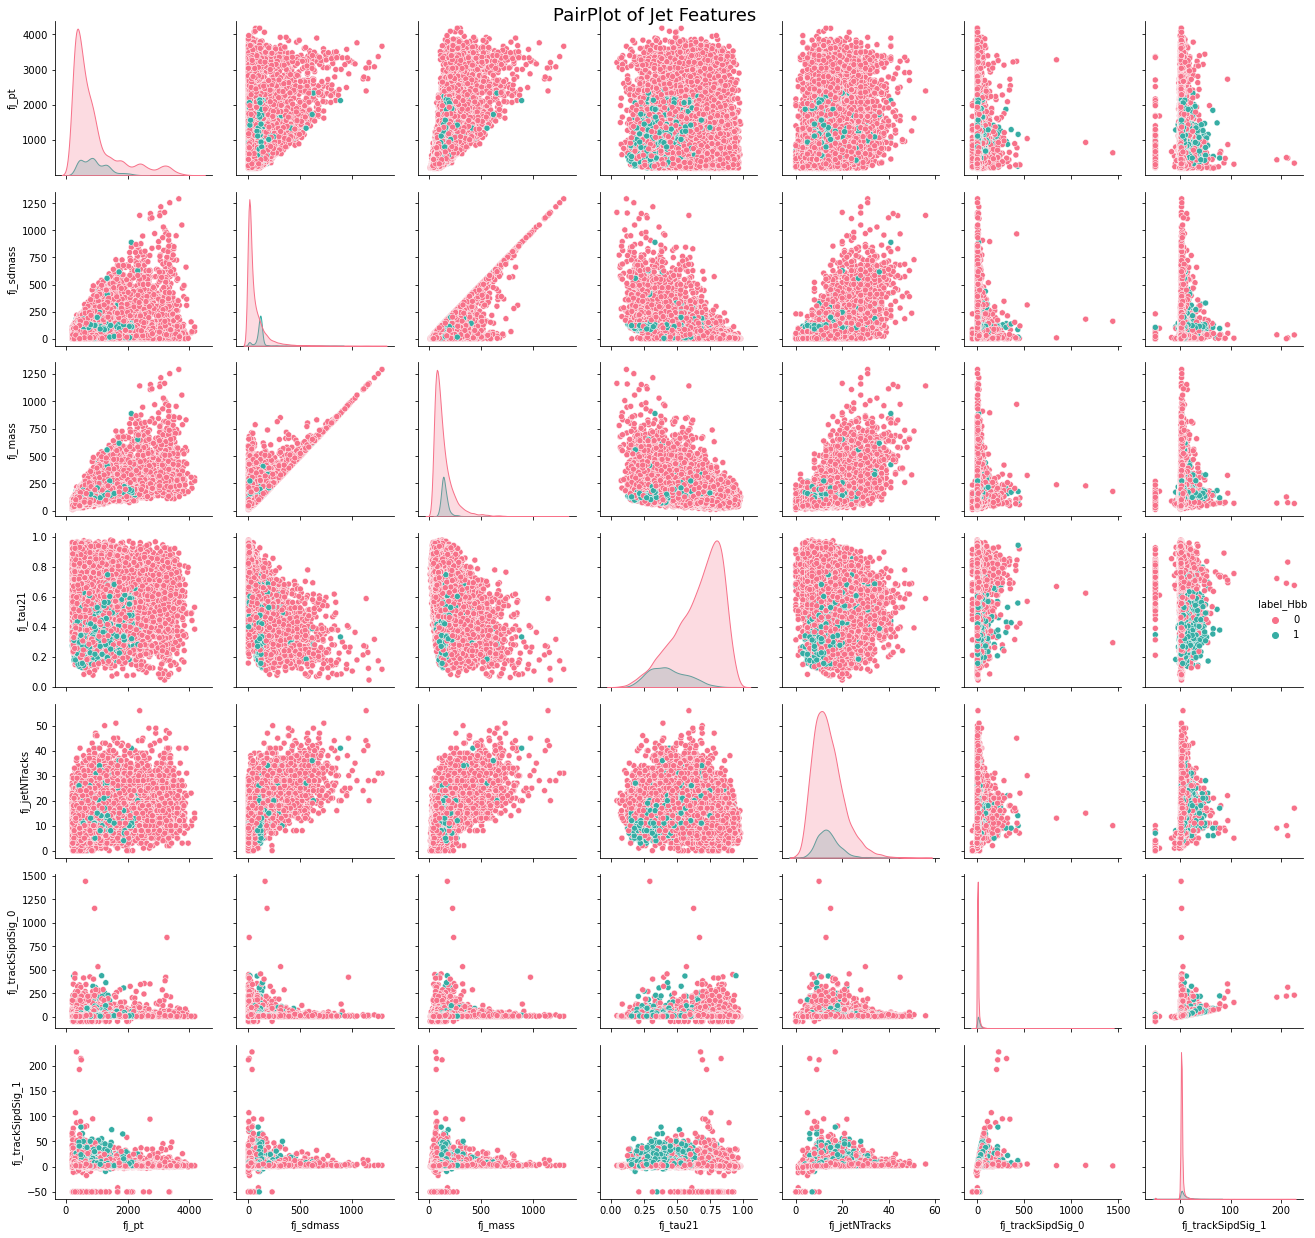

In [6]:
dat = pd.DataFrame(jet_features)
dat['label_Hbb'] = label_Hbb
sns.pairplot(data=dat,
             palette="husl",
             hue="label_Hbb",
             vars=jet_labs)

plt.suptitle("PairPlot of Jet Features",fontsize=18)

plt.tight_layout()
plt.show()   # pairplot of jet features to see how separable the classes may be and to find potential features to use together

In [12]:
dat

,fj_pt,fj_sdmass,fj_mass,fj_tau21,fj_jetNTracks,fj_trackSipdSig_0,fj_trackSipdSig_1,label_Hbb
0,251.276917,24.089743,60.140232,0.875145,17.0,2.878375,2.328913,0
1,634.397156,14.324662,131.919769,0.782682,19.0,8.634221,5.527515,0
2,335.709717,5.484271,67.804375,0.864803,6.0,64.206963,1.710277,0
3,297.956512,46.913982,72.948784,0.528663,18.0,1.180673,1.023740,0
4,2401.233887,31.871714,264.834045,0.732428,15.0,1.649141,1.384200,0
...,...,...,...,...,...,...,...,...
19995,780.884888,9.858609,75.725899,0.895135,8.0,17.479692,1.817835,0
19996,448.293304,1.152671,46.196033,0.822888,9.0,2.363610,1.368997,0
19997,1728.591797,26.975750,172.521851,0.697738,15.0,20.974993,7.305458,0
19998,322.443054,100.374519,101.031654,0.392285,13.0,1.939522,1.938336,0


In [15]:
labels

{'label_QCD_b': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'label_QCD_bb': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'label_QCD_c': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'label_QCD_cc': array([0, 0, 0, ..., 0, 1, 1], dtype=int32),
 'label_QCD_others': array([1, 1, 1, ..., 1, 0, 0], dtype=int32),
 'label_H_bb': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'sample_isQCD': array([1, 1, 1, ..., 1, 1, 1], dtype=int32)}

In [ ]:
#dat[dat.columns[pd.Series(dat.columns).str.startswith('label_')]]

In [21]:
dat = dat.assign(**labels)

In [19]:
list(labels.keys())

['label_QCD_b',
 'label_QCD_bb',
 'label_QCD_c',
 'label_QCD_cc',
 'label_QCD_others',
 'label_H_bb',
 'sample_isQCD']

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

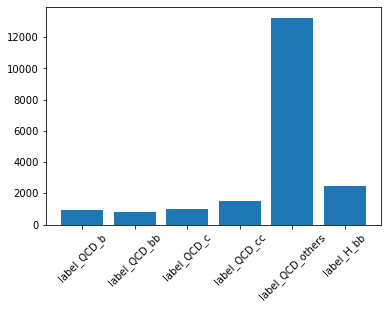

In [34]:
label_names = list(labels.keys())[:-1]
counts = dat[label_names].sum()
plt.bar(label_names, height=counts)
plt.xticks(rotation=45)


array([[<AxesSubplot:title={'center':'label_QCD_b'}>,
        <AxesSubplot:title={'center':'label_QCD_bb'}>,
        <AxesSubplot:title={'center':'label_QCD_c'}>],
       [<AxesSubplot:title={'center':'label_QCD_cc'}>,
        <AxesSubplot:title={'center':'label_QCD_others'}>,
        <AxesSubplot:title={'center':'label_H_bb'}>],
       [<AxesSubplot:title={'center':'sample_isQCD'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

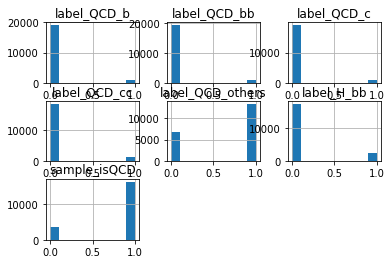

In [22]:
dat.hist(list(labels.keys()))

SyntaxError: invalid syntax (<ipython-input-16-e0dc0cecb4c6>, line 1)

### Histograms

In [7]:
import numpy as np

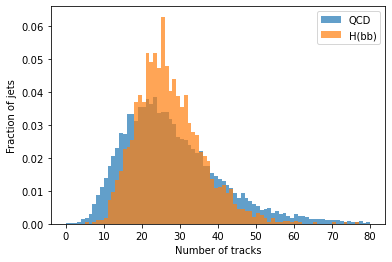

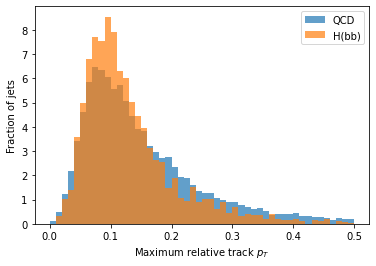

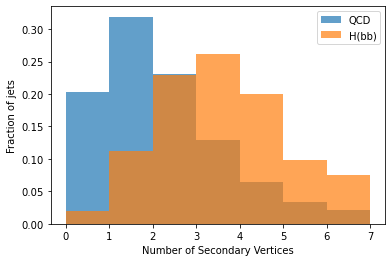

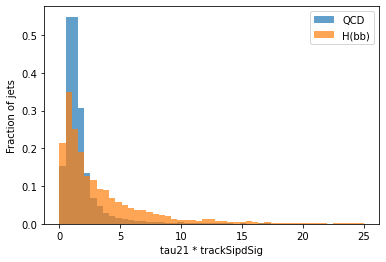

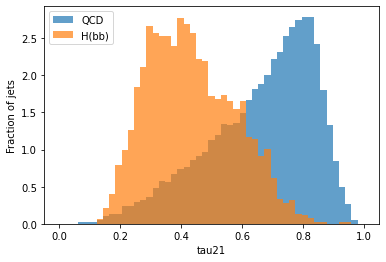

In [8]:
# number of tracks
plt.figure()
plt.hist(track_features['track_pt'].counts,weights=label_QCD,bins=np.linspace(0,80,81),density=True,alpha=0.7,label='QCD')
plt.hist(track_features['track_pt'].counts,weights=label_Hbb,bins=np.linspace(0,80,81),density=True,alpha=0.7,label='H(bb)')
plt.xlabel('Number of tracks')
plt.ylabel('Fraction of jets')
plt.legend()

# max. relative track pt
plt.figure()
plt.hist(track_features['track_pt'].max()/jet_features['fj_pt'],weights=label_QCD,bins=np.linspace(0,0.5,51),density=True,alpha=0.7,label='QCD')
plt.hist(track_features['track_pt'].max()/jet_features['fj_pt'],weights=label_Hbb,bins=np.linspace(0,0.5,51),density=True,alpha=0.7,label='H(bb)')
plt.xlabel(r'Maximum relative track $p_{T}$')
plt.ylabel('Fraction of jets')
plt.legend()

#number of secondary vertices
plt.figure()
plt.hist(sv_feats['n_sv'],weights=label_QCD,bins=np.linspace(0,7,8),density=True,alpha=0.7,label='QCD')
plt.hist(sv_feats['n_sv'],weights=label_Hbb,bins=np.linspace(0,7,8),density=True,alpha=0.7,label='H(bb)')
plt.xlabel(r'Number of Secondary Vertices')
plt.ylabel('Fraction of jets')
plt.legend()


plt.figure()
plt.hist(jet_features['fj_tau21'] * jet_features['fj_trackSipdSig_1'],weights=label_QCD,bins=np.linspace(0,25,50),density=True,alpha=0.7,label='QCD')
plt.hist(jet_features['fj_tau21'] * jet_features['fj_trackSipdSig_1'],weights=label_Hbb,bins=np.linspace(0,25,50),density=True,alpha=0.7,label='H(bb)')
plt.xlabel(r'tau21 * trackSipdSig')
plt.ylabel('Fraction of jets')
plt.legend()

plt.figure()
plt.hist(jet_features['fj_tau21'],weights=label_QCD,bins=np.linspace(0,1,50),density=True,alpha=0.7,label='QCD')
plt.hist(jet_features['fj_tau21'],weights=label_Hbb,bins=np.linspace(0,1,50),density=True,alpha=0.7,label='H(bb)')
plt.xlabel(r'tau21')
plt.ylabel('Fraction of jets')
plt.legend()